<a href="https://colab.research.google.com/github/hahustat/hello-world-page/blob/main/causal1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

ModuleNotFoundError: ignored

In [2]:
!pip install doWhy

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 377.7/377.7 kB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 174.4/174.4 kB 7.3 MB/s eta 0:00:00


In [4]:
import numpy as np

from dowhy import CausalModel
import dowhy.datasets

In [5]:
data = dowhy.datasets.linear_dataset(beta=10,
        num_common_causes=5,
        num_instruments = 2,
        num_effect_modifiers=1,
        num_samples=5000,
        treatment_is_binary=True,
        stddev_treatment_noise=10,
        num_discrete_common_causes=1)
df = data["df"]

In [6]:
df.head()

,X0,Z0,Z1,W0,W1,W2,W3,W4,v0,y
0,0.645820,0.0,0.917981,-1.187876,0.411972,0.662225,0.810772,1,True,10.388063
1,-2.518160,0.0,0.262257,-0.340456,2.193806,-1.321444,-0.640251,2,True,11.858540
2,-0.488937,0.0,0.225198,-0.065093,-0.395382,0.623533,-0.188404,1,False,2.199056
3,-0.840867,0.0,0.041160,0.412832,1.708048,1.729102,1.262803,1,True,19.349728
4,0.280091,0.0,0.108776,1.643713,0.073654,1.020634,-1.201207,2,False,13.404022


In [7]:
# With graph
model=CausalModel(
        data = df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        graph=data["gml_graph"]
        )

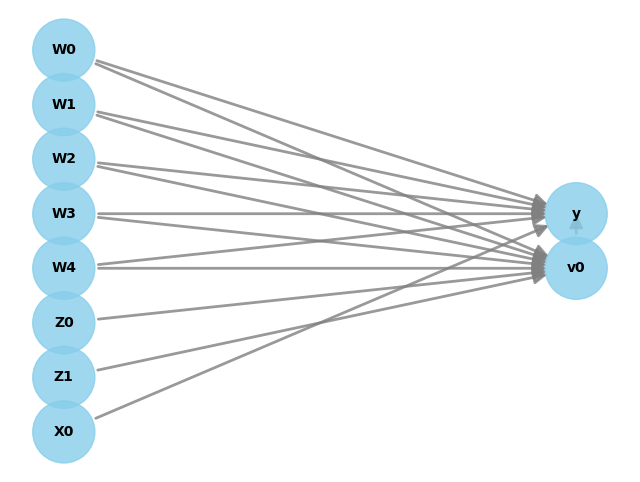

In [8]:
model.view_model()

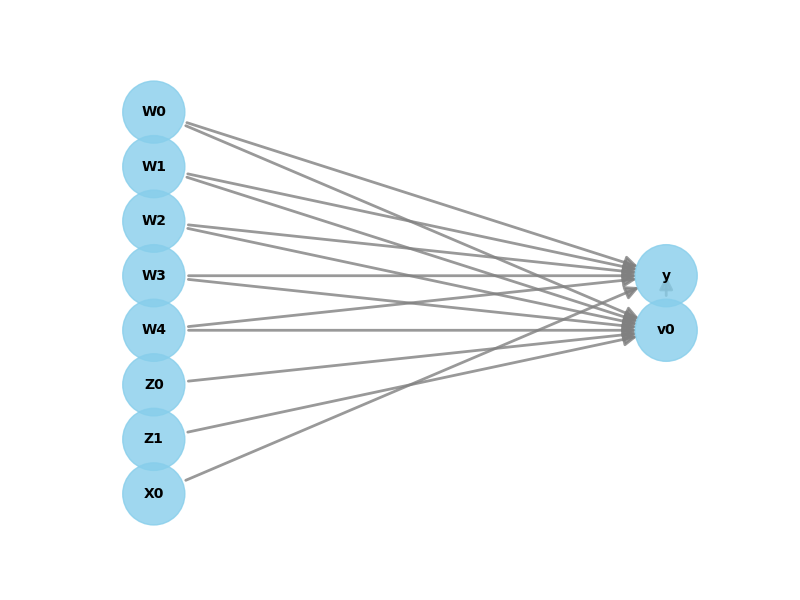

In [9]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [10]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)
print(identified_estimand)

Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W3,W0,W1,W2,W4])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W3,W0,W1,W2,W4,U) = P(y|v0,W3,W0,W1,W2,W4)

### Estimand : 2
Estimand name: iv
Estimand expression:
 ⎡                              -1⎤
 ⎢    d        ⎛    d          ⎞  ⎥
E⎢─────────(y)⋅⎜─────────([v₀])⎟  ⎥
 ⎣d[Z₁  Z₀]    ⎝d[Z₁  Z₀]      ⎠  ⎦
Estimand assumption 1, As-if-random: If U→→y then ¬(U →→{Z1,Z0})
Estimand assumption 2, Exclusion: If we remove {Z1,Z0}→{v0}, then ¬({Z1,Z0}→y)

### Estimand : 3
Estimand name: frontdoor
No such variable(s) found!



In [11]:
causal_estimate = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification")
print(causal_estimate)

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W3,W0,W1,W2,W4])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W3,W0,W1,W2,W4,U) = P(y|v0,W3,W0,W1,W2,W4)

## Realized estimand
b: y~v0+W3+W0+W1+W2+W4
Target units: ate

## Estimate
Mean value: 10.30252629681056



In [13]:
# Causal effect on the control group (ATC)
causal_estimate_att = model.estimate_effect(identified_estimand,
        method_name="backdoor.propensity_score_stratification",
        target_units = "atc")
print(causal_estimate_att)
print("Causal Estimate is " + str(causal_estimate_att.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W3,W0,W1,W2,W4])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W3,W0,W1,W2,W4,U) = P(y|v0,W3,W0,W1,W2,W4)

## Realized estimand
b: y~v0+W3+W0+W1+W2+W4
Target units: atc

## Estimate
Mean value: 10.255902713205701

Causal Estimate is 10.255902713205701


In [14]:
# Without graph
model= CausalModel(
        data=df,
        treatment=data["treatment_name"],
        outcome=data["outcome_name"],
        common_causes=data["common_causes_names"],
        effect_modifiers=data["effect_modifier_names"])

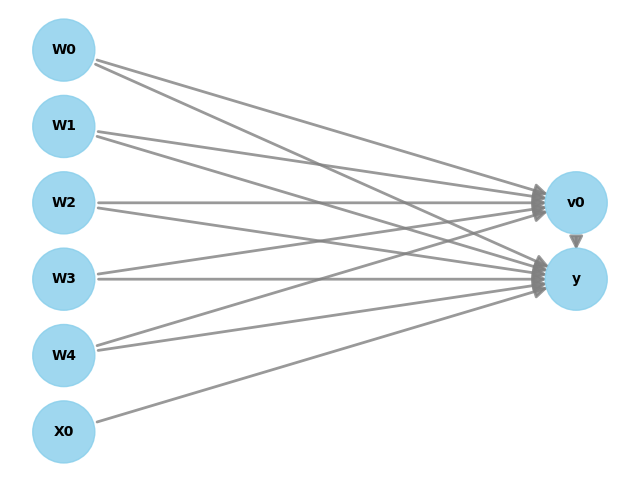

In [15]:
model.view_model()

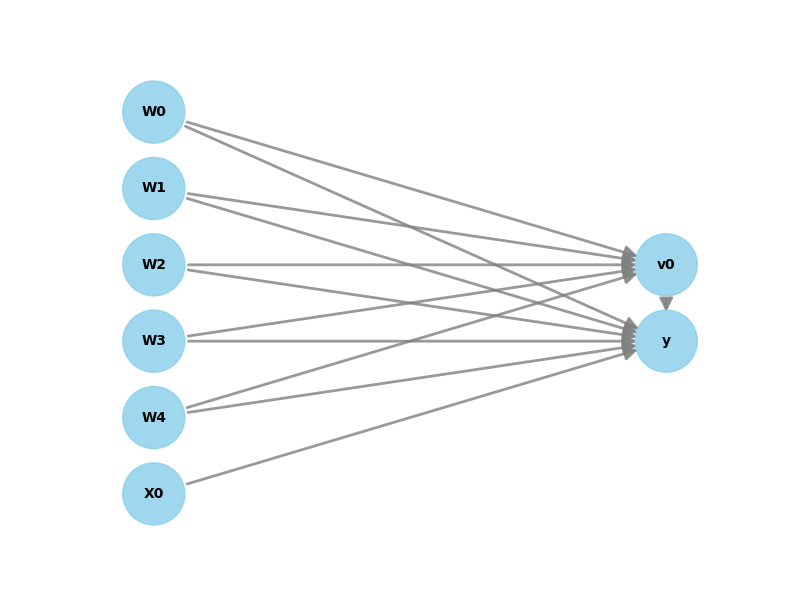

In [16]:
from IPython.display import Image, display
display(Image(filename="causal_model.png"))

In [17]:
identified_estimand = model.identify_effect(proceed_when_unidentifiable=True)

In [18]:
estimate = model.estimate_effect(identified_estimand,
                                 method_name="backdoor.propensity_score_stratification")
print(estimate)
print("Causal Estimate is " + str(estimate.value))

*** Causal Estimate ***

## Identified estimand
Estimand type: EstimandType.NONPARAMETRIC_ATE

### Estimand : 1
Estimand name: backdoor
Estimand expression:
  d                       
─────(E[y|W3,W1,W0,W2,W4])
d[v₀]                     
Estimand assumption 1, Unconfoundedness: If U→{v0} and U→y then P(y|v0,W3,W1,W0,W2,W4,U) = P(y|v0,W3,W1,W0,W2,W4)

## Realized estimand
b: y~v0+W3+W1+W0+W2+W4
Target units: ate

## Estimate
Mean value: 10.30252629681056

Causal Estimate is 10.30252629681056


In [19]:
res_random=model.refute_estimate(identified_estimand, estimate, method_name="random_common_cause", show_progress_bar=True)
print(res_random)

Refuting Estimates:   0%|          | 0/100 [00:00<?, ?it/s]

Refute: Add a random common cause
Estimated effect:10.30252629681056
New effect:10.302526296810559
p value:1.0



In [20]:
res_placebo=model.refute_estimate(identified_estimand, estimate,
        method_name="placebo_treatment_refuter", show_progress_bar=True, placebo_type="permute")
print(res_placebo)

Refuting Estimates:   0%|          | 0/100 [00:00<?, ?it/s]

Refute: Use a Placebo Treatment
Estimated effect:10.30252629681056
New effect:0.0012337304903864126
p value:0.94



In [21]:
res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", show_progress_bar=True, subset_fraction=0.9)
print(res_subset)

Refuting Estimates:   0%|          | 0/100 [00:00<?, ?it/s]

Refute: Use a subset of data
Estimated effect:10.30252629681056
New effect:10.257833211883899
p value:0.8



In [22]:
res_subset=model.refute_estimate(identified_estimand, estimate,
        method_name="data_subset_refuter", show_progress_bar=True, subset_fraction=0.9, random_seed = 1, n_jobs=-1, verbose=10)
print(res_subset)

Refuting Estimates:   0%|          | 0/100 [00:00<?, ?it/s]

[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done   4 tasks      | elapsed:    8.4s
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:   10.4s
[Parallel(n_jobs=-1)]: Done  14 tasks      | elapsed:   11.8s
[Parallel(n_jobs=-1)]: Done  21 tasks      | elapsed:   14.5s
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:   16.7s
[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:   21.1s
[Parallel(n_jobs=-1)]: Done  46 tasks      | elapsed:   24.8s
[Parallel(n_jobs=-1)]: Done  57 tasks      | elapsed:   28.5s
[Parallel(n_jobs=-1)]: Done  68 tasks      | elapsed:   32.4s
[Parallel(n_jobs=-1)]: Done  81 tasks      | elapsed:   38.4s
[Parallel(n_jobs=-1)]: Done  94 tasks      | elapsed:   43.1s


Refute: Use a subset of data
Estimated effect:10.30252629681056
New effect:10.259258136434964
p value:0.72



[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:   44.8s finished


In [23]:
res_unobserved=model.refute_estimate(identified_estimand, estimate, method_name="add_unobserved_common_cause",
                                     confounders_effect_on_treatment="binary_flip", confounders_effect_on_outcome="linear",
                                    effect_strength_on_treatment=0.01, effect_strength_on_outcome=0.02)
print(res_unobserved)

Refute: Add an Unobserved Common Cause
Estimated effect:10.30252629681056
New effect:9.920308874263364



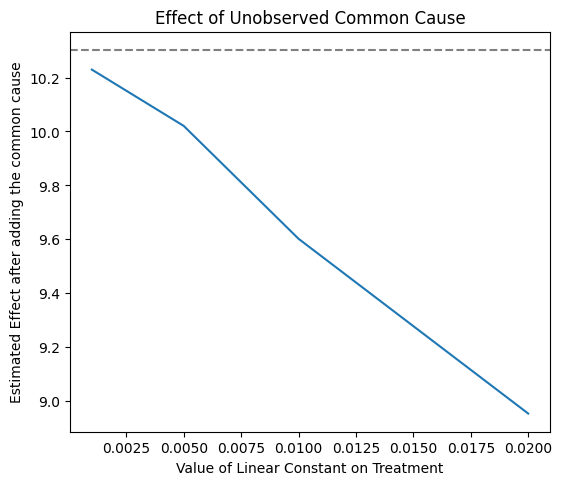

Refute: Add an Unobserved Common Cause
Estimated effect:10.30252629681056
New effect:(8.954094338188506, 10.22946552855072)



In [24]:
res_unobserved_range=model.refute_estimate(identified_estimand, estimate, method_name="add_unobserved_common_cause",
                                     confounders_effect_on_treatment="binary_flip", confounders_effect_on_outcome="linear",
                                    effect_strength_on_treatment=np.array([0.001, 0.005, 0.01, 0.02]), effect_strength_on_outcome=0.01)
print(res_unobserved_range)

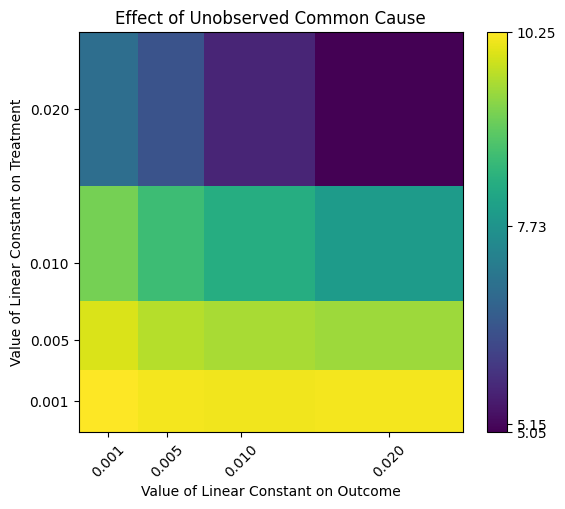

Refute: Add an Unobserved Common Cause
Estimated effect:10.30252629681056
New effect:(5.047167165140273, 10.245453001278012)



In [25]:
res_unobserved_range=model.refute_estimate(identified_estimand, estimate, method_name="add_unobserved_common_cause",
                                           confounders_effect_on_treatment="binary_flip", confounders_effect_on_outcome="linear",
                                           effect_strength_on_treatment=[0.001, 0.005, 0.01, 0.02],
                                           effect_strength_on_outcome=[0.001, 0.005, 0.01,0.02])
print(res_unobserved_range)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


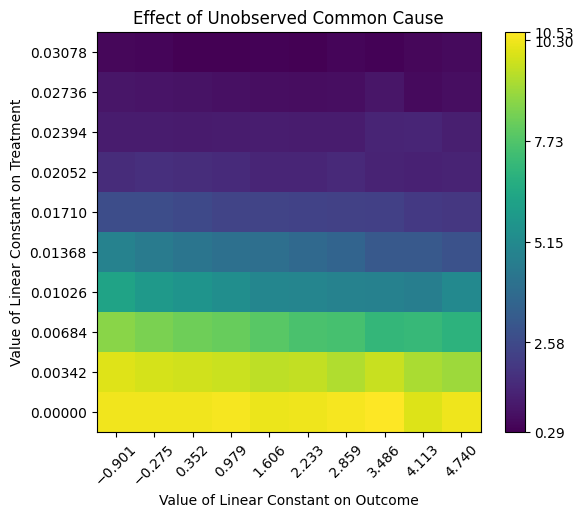

Refute: Add an Unobserved Common Cause
Estimated effect:10.30252629681056
New effect:(0.2919900102536091, 10.528101464346307)



In [26]:
res_unobserved_auto = model.refute_estimate(identified_estimand, estimate, method_name="add_unobserved_common_cause",
                                           confounders_effect_on_treatment="binary_flip", confounders_effect_on_outcome="linear")
print(res_unobserved_auto)